In [1]:
#1: Import the libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score


# upload
df = pd.read_csv(r"C:\Users\janos\Documents\Th Studium WIW\Auslandssemester\Fächer\Business Analytics\Python\CreditCard.csv")

# shape
print("Shape of the data:", df.shape)



# describe
print(df.describe())

# missing values
print("Missing values:\n", df.isnull().sum())
# no missing data

Shape of the data: (1319, 12)
           reports          age       income        share  expenditure  \
count  1319.000000  1319.000000  1319.000000  1319.000000  1319.000000   
mean      0.456406    33.213103     3.365376     0.068732   185.057071   
std       1.345267    10.142783     1.693902     0.094656   272.218917   
min       0.000000     0.166667     0.210000     0.000109     0.000000   
25%       0.000000    25.416670     2.243750     0.002316     4.583333   
50%       0.000000    31.250000     2.900000     0.038827   101.298300   
75%       0.000000    39.416670     4.000000     0.093617   249.035800   
max      14.000000    83.500000    13.500000     0.906320  3099.505000   

        dependents       months   majorcards       active  
count  1319.000000  1319.000000  1319.000000  1319.000000  
mean      0.993935    55.267627     0.817286     6.996967  
std       1.247745    66.271746     0.386579     6.305812  
min       0.000000     0.000000     0.000000     0.000000  
25%

In [2]:
#Just for my overview
print(df.head)

<bound method NDFrame.head of      card  reports       age  income     share  expenditure owner selfemp  \
0     yes        0  37.66667  4.5200  0.033270   124.983300   yes      no   
1     yes        0  33.25000  2.4200  0.005217     9.854167    no      no   
2     yes        0  33.66667  4.5000  0.004156    15.000000   yes      no   
3     yes        0  30.50000  2.5400  0.065214   137.869200    no      no   
4     yes        0  32.16667  9.7867  0.067051   546.503300   yes      no   
...   ...      ...       ...     ...       ...          ...   ...     ...   
1314  yes        0  33.58333  4.5660  0.002146     7.333333   yes      no   
1315   no        5  23.91667  3.1920  0.000376     0.000000    no      no   
1316  yes        0  40.58333  4.6000  0.026513   101.298300   yes      no   
1317  yes        0  32.83333  3.7000  0.008999    26.996670    no     yes   
1318  yes        0  48.25000  3.7000  0.111619   344.157500   yes      no   

      dependents  months  majorcards  active 

In [3]:
# 2: Convert categorical variables to numerical
df['card'] = df['card'].apply(lambda x: 1 if x == 'yes' else 0)
df['owner'] = df['owner'].apply(lambda x: 1 if x == 'yes' else 0)
df['selfemp'] = df['selfemp'].apply(lambda x: 1 if x == 'yes' else 0)

# eliminate: when column or row has missing data and if loosing this data doesnt relly matter/is not critical.
# fill in: for important data, especially numeric and cathegorical data

In [4]:
# Drop rows with missing values (if necessary)
# drops whole row!
#df.dropna(inplace=True)
#NOT NECESSARY



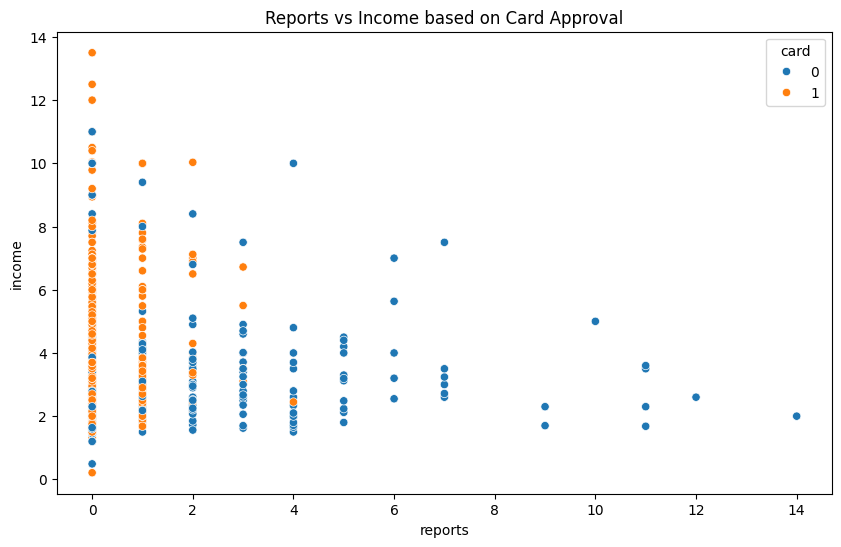

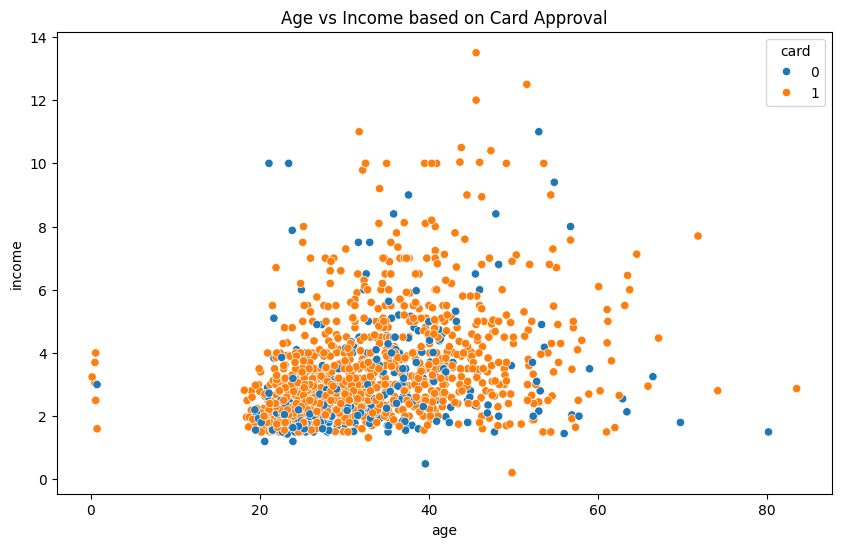

In [9]:
#3: Exploratory analysis
# Choosing 'reports', 'income', 'age', and 'expenditure' as significant variables
#explain 
# reports: sign for a bad financial situation of the card applier. info about the financial risk
# income: financial performace inficator. can he pay his credits? is he worth the card?
# age: student? young man? more age --> more experience --> usually the better job --> more money --> credit worthiness
# expendidure: how much is it compared to the income? gives information about the financial situation. Do he nead a credit card and can he pay for the credits

plt.figure(figsize=(10, 6))
sns.scatterplot(x='reports', y='income', hue='card', data=df)
plt.title('Reports vs Income based on Card Approval')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='income', hue='card', data=df)
plt.title('Age vs Income based on Card Approval')
plt.show()





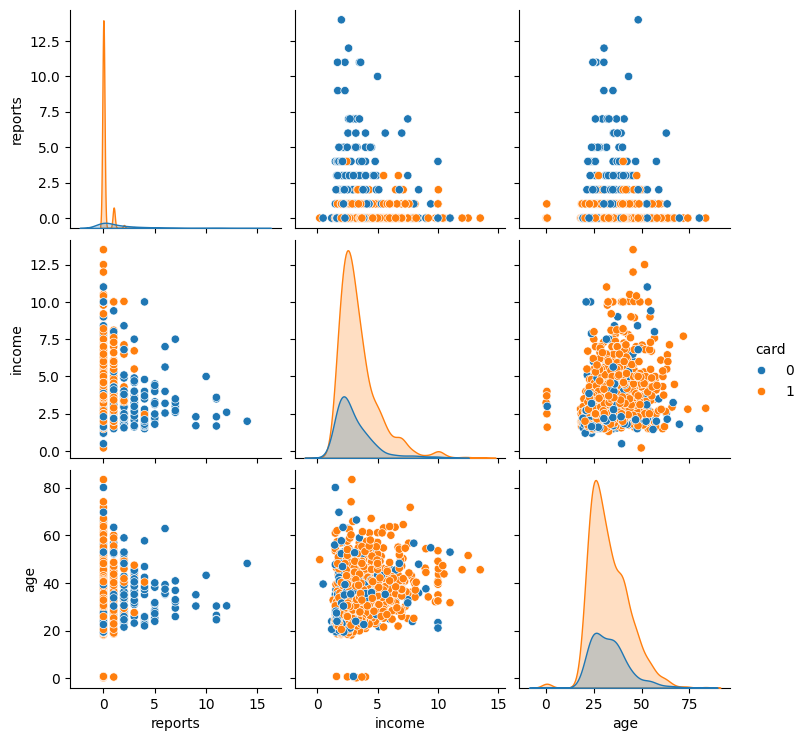

In [10]:
#plotted a bit more for my overview
sns.pairplot(df, vars=['reports', 'income', 'age'], hue='card')
plt.show()



In [11]:
# sns.displot is for single variables
#Conclude with the insights you gain from the generated graphs


#conclusion with the graphs:
# More reports leads to a worse financial situation and a worse credit worthiness--> more reports--> less cards
# higher income leads to more credit worthiness and to more card, income increases a bit with the age

In [13]:
#4: Splitting the dataset and logistic regression model
X = df[['reports', 'age', 'income', 'share', 'expenditure', 'owner', 'selfemp', 'dependents', 'months', 'majorcards', 'active']]
y = df['card']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the logistic regression model


model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

#Explain why we use this model and not linear regression
# We use logistic regression because it is designed for classification problems where the outcome is binary, like "approved" or "not approved." 
# It predicts probabilities that help classify the result as 0 or 1. Linear regression is not suitable because it is for continuous outcomes and could give predictions outside the range of 0 and 1, 
# which doesn't work for classification.
# Predict on the test set
y_pred = model.predict(X_test)



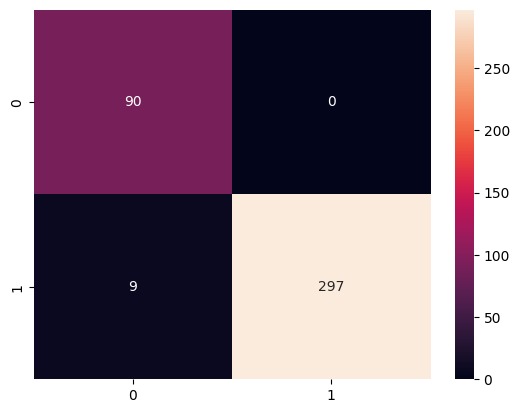

Accuracy: 0.9772727272727273
Recall: 0.9705882352941176
F1 Score: 0.9850746268656716


In [14]:
#5: Assess the model
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.show()

# Print accuracy, recall, and F1 score
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")




    
Accuracy (97.7%):
The model predicts correctly 97.7% of the time. This means it’s highly accurate overall

Recall (97.1%):
The model catches 97.1% of all the approved cases, meaning very few creditworthy applications are missed. 

F1-Score (98.5%):
A high F1-score shows that the model is good at both making accurate approvals and avoiding mistakes.

Conclusion:

The model is very reliable at predicting credit card approvals, finding almost all worthy applicants, and maintaining a good balance between correct approvals and avoiding errors.

In [24]:
# Bonus: Logistic regression using statsmodels
import statsmodels.api as sm

X2 = sm.add_constant(X)
model_sm = sm.Logit(y, X2)


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model_sm = sm.Logit(y, X_scaled)
result = model_sm.fit()
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.420791
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                   card   No. Observations:                 1319
Model:                          Logit   Df Residuals:                     1308
Method:                           MLE   Df Model:                           10
Date:                Fri, 25 Oct 2024   Pseudo R-squ.:                  0.2097
Time:                        18:48:26   Log-Likelihood:                -555.02
converged:                       True   LL-Null:                       -702.28
Covariance Type:            nonrobust   LLR p-value:                 2.238e-57
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -4.3968      0.276    -15.939      0.000      -4.937      -3.856
x2             0.0156      0.

X1 (p < 0.001): Statistically significant (p < 0.05), indicating a strong influence on card approval.

X2 (p = 0.860): Not significant (p > 0.05), suggesting little to no effect on card approval.

X3 (p = 0.068): Close to significant but not quite (p > 0.05). It may have a moderate effect but isn’t strongly predictive.

X4 (p = 0.204): Not significant, so it likely has little impact on card approval.

X5 (p = 0.086): Just above the threshold, so it's only weakly significant, suggesting it has limited predictive power.

X6 (p = 0.151): Not significant, indicating it doesn’t contribute much to predicting card approval.

X7 (p = 0.011): Significant (p < 0.05), meaning it likely has a meaningful impact on the outcome.

X8 (p = 0.183): Not significant, so it likely doesn’t affect card approval much.

X9 (p = 0.076): Close to significance but not fully; may have some effect but isn’t strongly predictive.

X10 (p < 0.001): Highly significant, suggesting a strong influence on card approval.

In [25]:
# Evaluate the statsmodels model
y_pred_sm = result.predict(X_test)
y_pred_sm_bin = [1 if val > 0.5 else 0 for val in y_pred_sm]

accuracy_sm = accuracy_score(y_test, y_pred_sm_bin)
recall_sm = recall_score(y_test, y_pred_sm_bin)
f1_sm = f1_score(y_test, y_pred_sm_bin)

print(f"Statsmodels Accuracy: {accuracy_sm}")
print(f"Statsmodels Recall: {recall_sm}")
print(f"Statsmodels F1 Score: {f1_sm}")

Statsmodels Accuracy: 0.8257575757575758
Statsmodels Recall: 1.0
Statsmodels F1 Score: 0.8986784140969163


Model 1 performs worse than Model 2. Although Model 1 has a good accuracy of 82.6%, Model 2 achieves an even higher accuracy of 97.7%. Model 1 has a perfect recall score, meaning it identifies all positive cases, but its F1 score (0.899) is significantly lower than Model 2's F1 score (0.985), indicating it’s less balanced in overall precision and recall. Overall, Model 2 is more effective at correctly predicting both positive and negative cases.